In [1]:
from sklearn import datasets
from sklearn.feature_selection import VarianceThreshold

VarianceTreshold do dropowania kolumn z niską wariancją
korelacja 0.95 (pearson lub spearman do wyboru)
RFECV
absampling - powiększa mniejszą klasę żeby zrównoważyć rozkład klas
SMOTE - skąd to?


In [49]:
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split

wine = load_wine()

X, y = wine.data, wine.target

X_train, X_test, y_train, y_test = train_test_split(X, y)

In [12]:
from sklearn.preprocessing import StandardScaler

standardizer = StandardScaler()

In [50]:
X_train_std = standardizer.fit_transform(X_train)
X_test_std = standardizer.fit_transform(X_test)

In [14]:
from sklearn.decomposition import PCA

pca = PCA(n_components=2, whiten=True)

X_pca = pca.fit_transform(X_train_std)

In [15]:
X_pca.shape

(178, 2)

c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

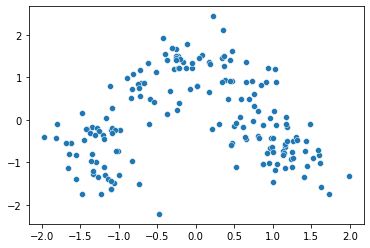

In [16]:
import seaborn as sb

sb.scatterplot(X_pca[:,0], X_pca[:,1])

In [59]:
from sklearn.cluster import KMeans
import numpy as np
from scipy.spatial.distance import cdist
    

distortions = []
inertias = []
mapping1 = {}
mapping2 = {}
K = range(1, 10)
  
for k in K:
    km = KMeans(n_clusters=k, init="random")
    km.fit(X_train_std)
  
    distortions.append(sum(np.min(cdist(X_train_std, km.cluster_centers_,
                                        'euclidean'), axis=1)) / X_train_std.shape[0])
    inertias.append(km.inertia_)
  
    #mapping1[k] = sum(np.min(cdist(X_train_std, km.cluster_centers_,
                          #         'euclidean'), axis=1)) / X_train_std.shape[0]
    #mapping2[k] = km.inertia_


c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

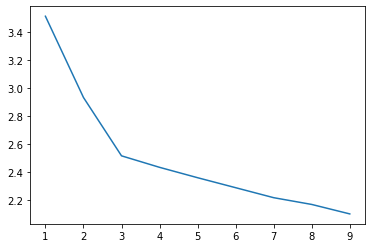

In [60]:
sb.lineplot(K, distortions)

In [62]:
from sklearn.metrics import silhouette_score

clusters = []
scores = []

for k in range(2,11):
    clusters.append(k)
    km = KMeans(n_clusters=k).fit(X_train_std)
    km.fit(X_train_std)
    y_pred = km.predict(X_test_std)
    scores.append(silhouette_score(X_test_std, y_pred))

c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:>

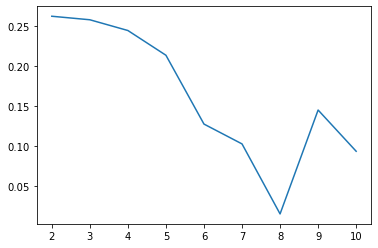

In [63]:
sb.lineplot(clusters, scores)

c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
c:\Users\Marta\anaconda3\envs\python_in_ml\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misi

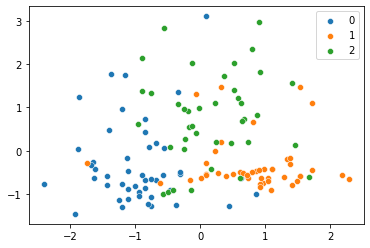

In [71]:
km_est = KMeans(n_clusters=3, init='random')

y_km = km_est.fit_predict(X_train_std)

u_labels = np.unique(y_km)


for i in u_labels:
    sb.scatterplot(X_train_std[y_km == i , 0] , X_train_std[y_km == i , 1] , label = i)

In [69]:
from sklearn.metrics import accuracy_score

accuracy_score(y_train, y_km)

0.3082706766917293